In [2]:
import numpy as np, sympy as smp, matplotlib.pyplot as plt, plotly.graph_objects as go
from scipy.integrate import quad, dblquad
from IPython.display import HTML

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

The Electric Field at a point at $\vec r$ for any configuration at $\vec{\mathscr R}$ in $\mathbb R^3$ is given by $$\vec E=\frac 1{4\pi \epsilon_0}\int_\xi\frac{\vec r-\vec{\mathscr R}}{\|\vec r-\vec{\mathscr R}\|^3}dq$$ where $\xi$ is the reigion of space one wishes to integrate over and the Charge Element $dq$ can correspond to a region of space, either in:
- 1 dimension: $\displaystyle dq=\lambda(\vec{\mathscr R})\,\|d\vec{\mathscr R}\|=\lambda(\vec{\mathscr R})\,\Bigg\|\frac{d\vec{\mathscr R}}{dt}\Bigg\|\,dt$
- 2 dimensions: $dq=\sigma\,(\vec{\mathscr R})\|\vec{\mathscr R_u'}\times \vec{\mathscr R_v'}\|\,dudv$
- 3 dimensions: $dq=\Rho(\vec{\mathscr R})\,\rho^2\sin(\theta)\,d\rho d\theta d\phi$

where $t,$ $u$ and $v,$ $\rho$ and $\theta$ and $\phi$ are parameters; and $\lambda(\vec{\mathscr R}),$ $\sigma(\vec{\mathscr R})$ and $\Rho(\vec{\mathscr R})$ are the Line, Surface and Volume Charge Densities as functions of the configuration's shape.

Side note: $\Rho(\vec{\mathscr R})$ is used for Volume Charge Density instead of $\rho(\vec{\mathscr R})$ as $\rho$ is implemented as the Radius Vector in Spherical Coordinates already. 

This is made dimensionless for python as $$\frac{4\pi \epsilon_0 L^2}Q\vec E=\int_\xi \frac{\Omega_d(\vec{\mathscr R_d})}{\|\vec r_d-\vec{\mathscr R_d}\|^3}(\vec r_d-\vec{\mathscr R_d})\,d\mathscr T_d$$ where 
- The subscript $d$ signifies nondimensionality.
- $Q$ and $L$ are charachteristic Charges and Lengths respectively.
- $\Omega_d(\vec{\mathscr R_d})$ is a General Charge Density.
- $d\mathscr T$ is a general region in $\mathbb R^n$ so that $dq=\Omega_d(\vec{\mathscr R_d})\,d\mathscr T$.

# Example in 1-D:

Consider an object
- $\vec{\mathscr R}=\langle\cos(4t),\sin(4t),t\rangle$ for $t\in[0,2\pi].$
- $\vec r=\langle x,y,z\rangle$
- $L=Q=1$
- Charge is evenly distributed across its length.

In [3]:
t = smp.symbols('t', positive = True)
x, y, z = smp.symbols('x y z')

Since $$dq=\lambda(\vec{\mathscr R})\,\Bigg\|\frac{d\vec{\mathscr R}}{dt}\Bigg\|\,dt$$ and $Q=1$ we have $$\lambda(\vec{\mathscr R})=\Bigg[\int_\xi \bigg\|\frac{d\vec{\mathscr R}}{dt}\bigg\|\,dt\Bigg]^{-1}$$

In [4]:
r = smp.Matrix([x, y, z])
R = smp.Matrix([smp.cos(4 * t), smp.sin(4 * t), t])

sep = r - R
sep

Matrix([
[x - cos(4*t)],
[y - sin(4*t)],
[      -t + z]])

In [5]:
dR_dt = smp.diff(R, t).norm().simplify()
lam = smp.integrate(dR_dt, (t, 0, 2 * smp.pi))

integrand = lam * sep / sep.norm() ** 3 * dR_dt
integrand

Matrix([
[34*pi*(x - cos(4*t))/(Abs(t - z)**2 + Abs(x - cos(4*t))**2 + Abs(y - sin(4*t))**2)**(3/2)],
[34*pi*(y - sin(4*t))/(Abs(t - z)**2 + Abs(x - cos(4*t))**2 + Abs(y - sin(4*t))**2)**(3/2)],
[      34*pi*(-t + z)/(Abs(t - z)**2 + Abs(x - cos(4*t))**2 + Abs(y - sin(4*t))**2)**(3/2)]])

In [6]:
dEx_dt = smp.lambdify([t, x, y, z], integrand[0])
dEy_dt = smp.lambdify([t, x, y, z], integrand[1])
dEz_dt = smp.lambdify([t, x, y, z], integrand[2])

In [7]:
def E(x, y, z):
    return np.array([quad(dEx_dt, 0, 2 * np.pi, args = (x, y, z))[0],
                     quad(dEy_dt, 0, 2 * np.pi, args = (x, y, z))[0],
                     quad(dEz_dt, 0, 2 * np.pi, args = (x, y, z))[0]])

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = np.linspace(0, 2 * np.pi, 10)

xv, yv, zv = np.meshgrid(x, y, z)

In [ ]:
field = np.vectorize(E, signature = '(),(),()->(n)')(xv, yv, zv)

Ex = field[:,:,:,0]
Ey = field[:,:,:,1]
Ez = field[:,:,:,2]

Text(0, 0.5, 'Frequency')

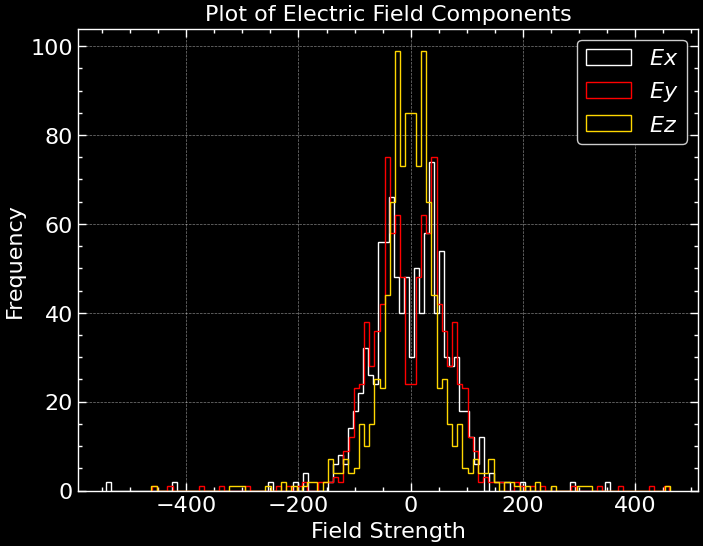

In [23]:
plt.hist(Ex.ravel(), bins = 100, histtype = 'step', label = r'$Ex$', color = 'white')
plt.hist(Ey.ravel(), bins = 100, histtype = 'step', label = r'$Ey$', color = 'red')
plt.hist(Ez.ravel(), bins = 100, histtype = 'step', label = r'$Ez$', color = 'gold')

plt.legend()

plt.title('Plot of Electric Field Components')
plt.xlabel('Field Strength')
plt.ylabel('Frequency')

In [24]:
E_max = 150

Ex[Ex > E_max] = E_max
Ey[Ey > E_max] = E_max
Ez[Ez > E_max] = E_max

Ex[Ex < -E_max] = -E_max
Ey[Ey < -E_max] = -E_max
Ez[Ez < -E_max] = -E_max

In [25]:
t_values = np.linspace(0, 2 * np.pi, 1000)
Lx, Ly, Lz = np.cos(4 * t_values), np.sin(4 * t_values), t_values

In [29]:
data = go.Cone(x = xv.ravel(), y = yv.ravel(), z = zv.ravel(),
               u = Ex.ravel(), v = Ey.ravel(), w = Ez.ravel(),
               colorscale = 'Inferno', colorbar = dict(title = r'$x^2$'),
               sizemode = 'scaled', sizeref = 0.5)

layout = go.Layout(title = 'Electric Field of the Configuration in 1-D', scene = dict(xaxis_title = r'x', yaxis_title = r'y', zaxis_title = r'z',
                   aspectratio = dict(x = 1, y = 1, z = 1), camera_eye = dict(x = 1.2, y = 1.2, z = 1.2)))

fig = go.Figure(data = data, layout = layout)
fig.layout.template = 'plotly_dark'
fig.add_scatter3d(x = Lx, y = Ly, z = Lz, mode = 'lines',
                  line = dict(color = 'green', width = 10))

fig.write_html('../Outputs/elec-field_1D.html')
fig.show()

# Example in 2-D:

Consider an object
- $\vec{\mathscr R}=\langle\cos(v)\,[2+\cos(u)],\sin(v)\,[2+\cos(u)],2+\sin(u)\rangle$ for $(u,v)\in[0,2\pi]\times[0,2\pi].$
- $\vec r=\langle x,y,z\rangle$
- $L=Q=1$
- Charge is evenly distributed across its surface.

In [8]:
u, v = smp.symbols('u v', positive = True)
x, y, z = smp.symbols('x y z')

Since $$dq=\sigma(\vec{\mathscr R})\,\|\vec{\mathscr R_u'}\times \vec{\mathscr R_v'}\|\,dudv$$ and $Q=1$ we have $$\sigma(\vec{\mathscr R})=\Bigg[\iint_\xi \|\vec{\mathscr R_u'}\times \vec{\mathscr R_v'}\|\,dudv\Bigg]^{-1}$$

In [9]:
r = smp.Matrix([x, y, z])
R = smp.Matrix([smp.cos(v) * (2 + smp.cos(u)), smp.sin(v) * (2 + smp.cos(u)), 2 + smp.sin(u)])

sep = r - R
sep

Matrix([
[x - (cos(u) + 2)*cos(v)],
[y - (cos(u) + 2)*sin(v)],
[         z - sin(u) - 2]])

In [10]:
dR_dt = (smp.diff(R, u).cross(smp.diff(R, v))).norm().simplify()
sigma = smp.integrate(dR_dt, (u, 0, 2 * smp.pi), (v, 0, 2 * smp.pi)).simplify()

integrand = sigma * sep / sep.norm() ** 3 * dR_dt
integrand

Matrix([
[8*pi**2*(x - (cos(u) + 2)*cos(v))*Abs(cos(u) + 2)/(Abs(x - (cos(u) + 2)*cos(v))**2 + Abs(y - (cos(u) + 2)*sin(v))**2 + Abs(-z + sin(u) + 2)**2)**(3/2)],
[8*pi**2*(y - (cos(u) + 2)*sin(v))*Abs(cos(u) + 2)/(Abs(x - (cos(u) + 2)*cos(v))**2 + Abs(y - (cos(u) + 2)*sin(v))**2 + Abs(-z + sin(u) + 2)**2)**(3/2)],
[         8*pi**2*(z - sin(u) - 2)*Abs(cos(u) + 2)/(Abs(x - (cos(u) + 2)*cos(v))**2 + Abs(y - (cos(u) + 2)*sin(v))**2 + Abs(-z + sin(u) + 2)**2)**(3/2)]])

In [11]:
dEx_dt = smp.lambdify([u, v, x, y, z], integrand[0])
dEy_dt = smp.lambdify([u, v, x, y, z], integrand[1])
dEz_dt = smp.lambdify([u, v, x, y, z], integrand[2])

In [12]:
def E(x, y, z):
    return np.array([dblquad(dEx_dt, 0, 2 * np.pi, lambda x: 0, lambda x: 2 * np.pi, args = (x, y, z))[0],
                     dblquad(dEy_dt, 0, 2 * np.pi, lambda x: 0, lambda x: 2 * np.pi, args = (x, y, z))[0],
                     dblquad(dEz_dt, 0, 2 * np.pi, lambda x: 0, lambda x: 2 * np.pi, args = (x, y, z))[0]])

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = np.linspace(0, 2 * np.pi, 10)

xv, yv, zv = np.meshgrid(x, y, z)

In [13]:
field = np.vectorize(E, signature = '(),(),()->(n)')(xv, yv, zv)

Ex = field[:,:,:,0]
Ey = field[:,:,:,1]
Ez = field[:,:,:,2]

Text(0, 0.5, 'Frequency')

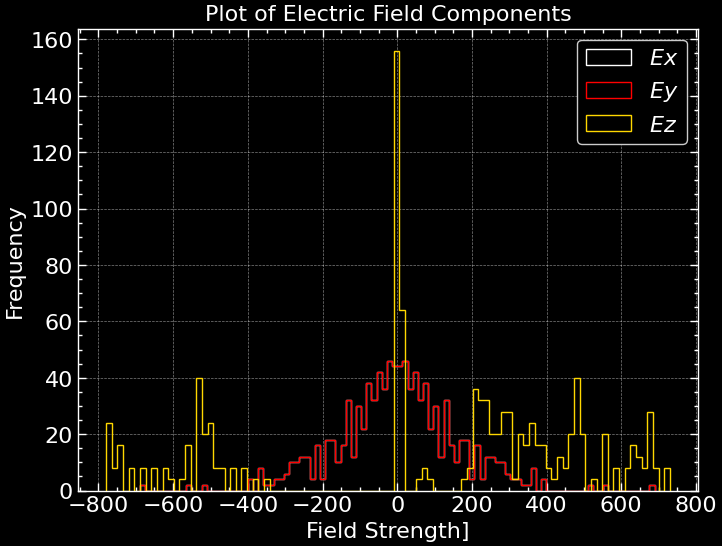

In [14]:
plt.hist(Ex.ravel(), bins=100, histtype='step', label=r'$Ex$', color='white')
plt.hist(Ey.ravel(), bins=100, histtype='step', label=r'$Ey$', color='red')
plt.hist(Ez.ravel(), bins=100, histtype='step', label=r'$Ez$', color='gold')

plt.legend()

plt.title('Plot of Electric Field Components')
plt.xlabel('Field Strength')
plt.ylabel('Frequency')

In [29]:
E_max = 500

Ex[Ex > E_max] = E_max
Ey[Ey > E_max] = E_max
Ez[Ez > E_max] = E_max

Ex[Ex < -E_max] = -E_max
Ey[Ey < -E_max] = -E_max
Ez[Ez < -E_max] = -E_max

In [30]:
u_values = np.linspace(0, 2 * np.pi, 1000)
v_values = np.linspace(0, 2 * np.pi, 1000)

Lx, Ly, Lz = np.cos(v_values) * (2 + np.cos(u_values)), np.sin(v_values) * (2 + np.cos(u_values)), 2 + np.sin(u_values)

In [31]:
data = go.Cone(x = xv.ravel(), y = yv.ravel(), z = zv.ravel(),
               u = Ex.ravel(), v = Ey.ravel(), w = Ez.ravel(),
               colorscale = 'Inferno', colorbar = dict(title = '$x^2$'),
               sizemode = 'scaled', sizeref = 0.5)

layout = go.Layout(title = 'Electric Field of the Configuration in 2-D', scene = dict(xaxis_title = r'x', yaxis_title = r'y', zaxis_title = r'z',
                   aspectratio = dict(x = 1, y = 1, z = 1), camera_eye = dict(x = 1.2, y = 1.2, z = 1.2)))

fig = go.Figure(data = data, layout = layout)
fig.layout.template = 'plotly_dark'
fig.add_scatter3d(x = Lx, y = Ly, z = Lz, mode = 'lines',
                  line = dict(color = 'green', width = 10))

fig.write_html('../Outputs/elec-field_2D.html')
fig.show()

Side Note: Computation of a 3-paramteterized object with a volume-distributed charge is a heavy computational task, so we'll not handle it here.